In [8]:
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt

def process_nc_file(filename):
    # Use dask to load the data in chunks
    chunks = {'time': 50, 'model_level_number': 5, 'grid_latitude': 10, 'grid_longitude': 10}
    ds = xr.open_dataset(filename, chunks=chunks)

    # Extract the variable and time data from the dataset
    variable_data = ds['number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air']
    variable_data_mean = variable_data.mean(dim=['grid_latitude', 'grid_longitude']).sel(model_level_number=3)
    print('variable_data_mean ',variable_data_mean )
    time_data = ds['time']

    # Compute the value of the mean
    variable_data_mean_value = variable_data_mean.compute()
    time_data_value = time_data.compute()

    # Print the value of the mean
    print('The mean of variable_data is:', variable_data_mean_value)

    # Convert the time data to a dask array
    time = da.from_array(ds['time'], chunks=chunks['time'])
    # variable_data_mean = da.compute_chunk_sizes(variable_data_mean)

    return variable_data_mean_value, time_data_value

import matplotlib.pyplot as plt

def plot_data(time_data_values, variable_data_mean_values, filenames):
    for i, (time_data_value, variable_data_mean_value) in enumerate(zip(time_data_values, variable_data_mean_values)):
        plt.plot(time_data_value, variable_data_mean_value, label=filenames[i])
    plt.xlabel('Time')
    plt.ylabel('Variable')
    plt.xticks(rotation=30)
    plt.title('Variable data')
    plt.legend()
    plt.show()

# Example usage:
path = "/ocean/projects/atm200005p/ding0928/nc_file_full/u-ct706/full_nc_files/"
filenames = [path+'Rgn_number_of_particles_per_air_molecule_of_insoluble_aitken_mode_aerosol_in_air_m01s34i119.nc',
             path+'Rgn_number_of_particles_per_air_molecule_of_soluble_accumulation_mode_aerosol_in_air_m01s34i107.nc',
             path+'Rgn_number_of_particles_per_air_molecule_of_soluble_aitken_mode_aerosol_in_air_m01s34i103.nc',
             path+'Rgn_number_of_particles_per_air_molecule_of_soluble_coarse_mode_aerosol_in_air_m01s34i113.nc',
             path+'Rgn_number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air_m01s34i101.nc']

time_data_values = []
variable_data_mean_values = []

for filename in filenames:
    variable_data_mean_value, time_data_value = process_nc_file(filename)
    variable_data_mean_values.append(variable_data_mean_value)
    time_data_values.append(time_data_value)

plot_data(time_data_values, variable_data_mean_values, filenames)

   


KeyError: 'number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air'

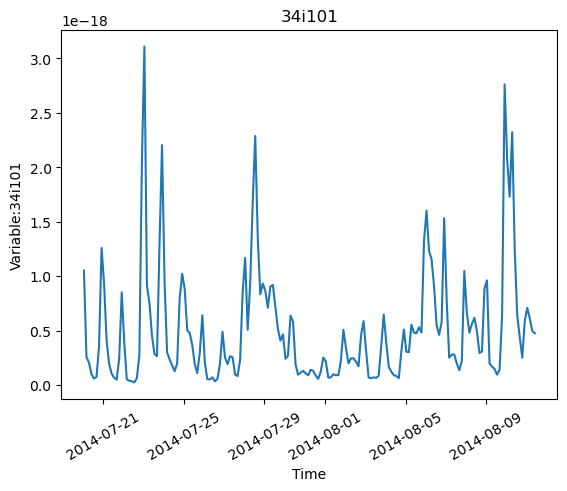

In [6]:
import matplotlib.pyplot as plt

def plot_data(time_data_value, variable_data_mean_value):
    plt.plot(time_data_value, variable_data_mean_value)
    plt.xlabel('Time')
    plt.ylabel('Variable:34i101')
    plt.xticks(rotation=30)
    plt.title('34i101')
    plt.show()

# Example usage:
plot_data(time_data_value, variable_data_mean_value)


In [ ]:
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt

def process_nc_file(filename):
    # Use dask to load the data in chunks
    chunks = {'time': 50, 'model_level_number': 5, 'grid_latitude': 10, 'grid_longitude': 10}
    ds = xr.open_dataset(filename, chunks=chunks)

    # Extract the variable and time data from the dataset
    variable_name = filename.split('/')[-1].split('_')[1:-1]
    variable_data = ds['_'.join(variable_name)]
    variable_data_mean = variable_data.mean(dim=['grid_latitude', 'grid_longitude']).sel(model_level_number=3)
    print(f'variable_data_mean ({variable_name}):', variable_data_mean)
    time_data = ds['time']

    # Compute the value of the mean
    variable_data_mean_value = variable_data_mean.compute()
    time_data_value = time_data.compute()

    # Print the value of the mean
    print(f'The mean of variable_data ({variable_name}) is:', variable_data_mean_value)

    # Convert the time data to a dask array
    time = da.from_array(ds['time'], chunks=chunks['time'])

    return variable_data_mean_value, time_data_value

def process_nc_files(filenames):
    variable_data_mean_values = []
    time_data_values = []

    for filename in filenames:
        variable_data_mean_value, time_data_value = process_nc_file(filename)
        variable_data_mean_values.append(variable_data_mean_value)
        time_data_values.append(time_data_value)

    return variable_data_mean_values, time_data_values

def plot_data(time_data_values, variable_data_mean_values, filenames):
    for i, (time_data_value, variable_data_mean_value) in enumerate(zip(time_data_values, variable_data_mean_values)):
        plt.plot(time_data_value, variable_data_mean_value, label=filenames[i])
    plt.xlabel('Time')
    plt.ylabel('Variable')
    plt.xticks(rotation=30)
    plt.title('Variable data')
    plt.legend()
    plt.show()

# Example usage:
path = "/ocean/projects/atm200005p/ding0928/nc_file_full/u-ct706/full_nc_files/"
filenames = [path+'Rgn_number_of_particles_per_air_molecule_of_insoluble_aitken_mode_aerosol_in_air_m01s34i119.nc',
             path+'Rgn_number_of_particles_per_air_molecule_of_soluble_accumulation_mode_aerosol_in_air_m01s34i107.nc',
             path+'Rgn_number_of_particles_per_air_molecule_of_soluble_aitken_mode_aerosol_in_air_m01s34i103.nc',
             path+'Rgn_number_of_particles_per_air_molecule_of_soluble_coarse_mode_aerosol_in_air_m01s34i113.nc',
             path+'Rgn_number_of_particles_per_air_molecule_of_soluble_nucleation_mode_aerosol_in_air_m01s34i101.nc']

variable_data_mean_values, time_data_values = process_nc_files(filenames)

plot_data(time_data_values, variable_data_mean_values, filenames)


variable_data_mean (['number', 'of', 'particles', 'per', 'air', 'molecule', 'of', 'insoluble', 'aitken', 'mode', 'aerosol', 'in', 'air']): <xarray.DataArray 'number_of_particles_per_air_molecule_of_insoluble_aitken_mode_aerosol_in_air' (
                                                                                                  time: 180)>
dask.array<getitem, shape=(180,), dtype=float64, chunksize=(50,), chunktype=numpy.ndarray>
Coordinates:
  * time                (time) datetime64[ns] 2014-07-20T01:00:00 ... 2014-08...
    model_level_number  int64 3
    forecast_period     (time) timedelta64[ns] dask.array<chunksize=(50,), meta=np.ndarray>
    level_height        float64 dask.array<chunksize=(), meta=np.ndarray>
    sigma               float64 dask.array<chunksize=(), meta=np.ndarray>
